## Visualize cross

- distribution of detection

In [1]:

import sys

sys.path.append("/home/jeans/internship/parking-customer-count")

from countpassenger.Config import conf
from countpassenger import Preprocess

import countpassenger
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import os

df_reverse = pd.read_csv(
    osp.join(conf.RESOURCES_RAW_DIR, "2024-04-28/mbk-tourist-raw-reverse-object-20240428.csv")
)

In [3]:
df_reverse = Preprocess.df_clean_customer(df_customer=df_reverse)
print(df_reverse.sort_values(by=conf.CUSTOMER_INTEREST_SNAPSHOT)[conf.CUSTOMER_INTEREST_SNAPSHOT].to_string())

         camera       timestamp_precise  xmin  xmax  ymin  ymax
1722  mbk-14-11 2024-04-28 02:00:15.521  1722  1925   224   519
1720  mbk-14-11 2024-04-28 02:05:56.230  2075  2143     0   170
1721  mbk-14-11 2024-04-28 02:06:56.733  1752  1932   107   463
1718  mbk-14-11 2024-04-28 02:10:21.000  2036  2164    18   278
1719  mbk-14-11 2024-04-28 02:11:19.743  1558  1745   320   615
1711  mbk-14-11 2024-04-28 02:19:42.366  2068  2146    32   236
1710  mbk-14-11 2024-04-28 02:21:08.546  2017  2162    32   274
1702  mbk-14-11 2024-04-28 02:30:57.989  1434  1757   192   770
1687  mbk-14-11 2024-04-28 02:50:44.632  1464  1663   124   772
1683  mbk-14-11 2024-04-28 03:02:21.326  1485  1661   133   491
1682  mbk-14-11 2024-04-28 03:04:42.287  1164  1413   332   983
1684  mbk-14-11 2024-04-28 03:04:52.164  1445  1722   110   669
1675  mbk-14-11 2024-04-28 03:04:59.682  1462  1644   107   775
1677  mbk-14-11 2024-04-28 03:05:10.882  1614  1759   229   592
1676  mbk-14-11 2024-04-28 03:07:07.089 

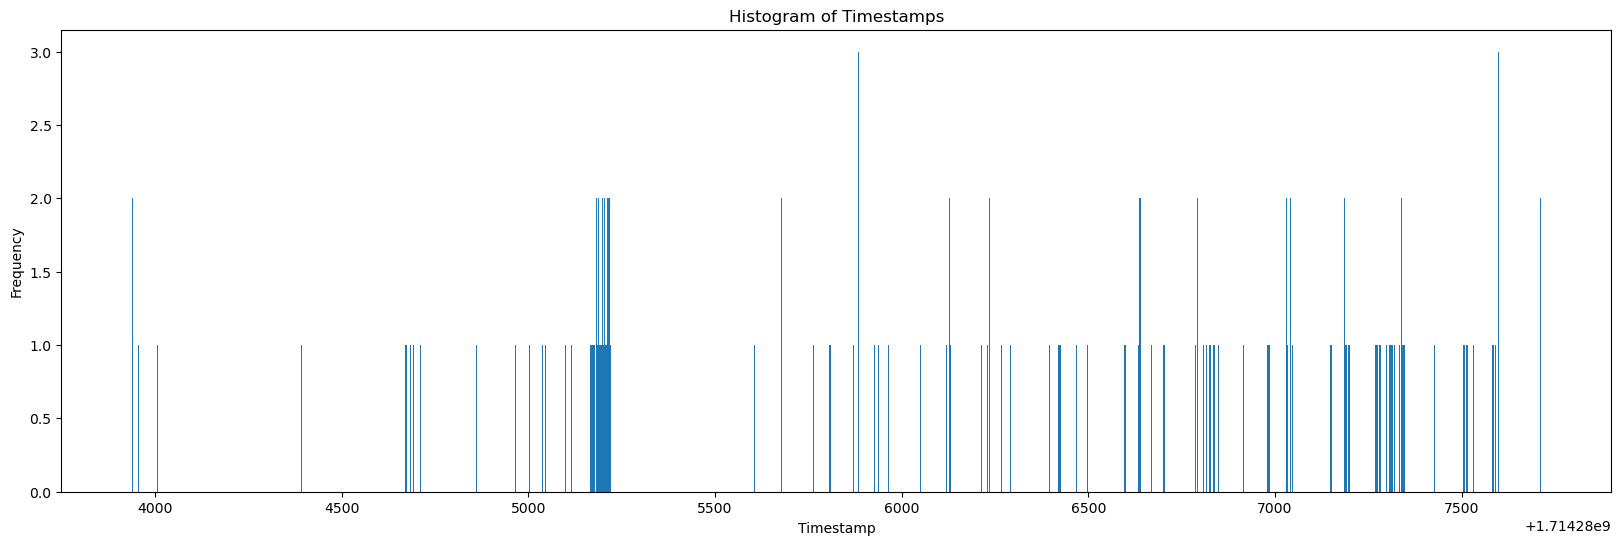

In [8]:
df_samecam = df_cross[df_cross['camera'] == 'mbk-14-13']


plt.figure(figsize=(20, 6))  # Set the figure size to 10 inches wide and 6 inches tall
plt.hist(df_samecam[(df_samecam['timestamp_unix'] >= 1714283888) & (df_samecam['timestamp_unix'] <= 1714288000)]['timestamp_unix'], bins=1200)
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamps')
plt.show()

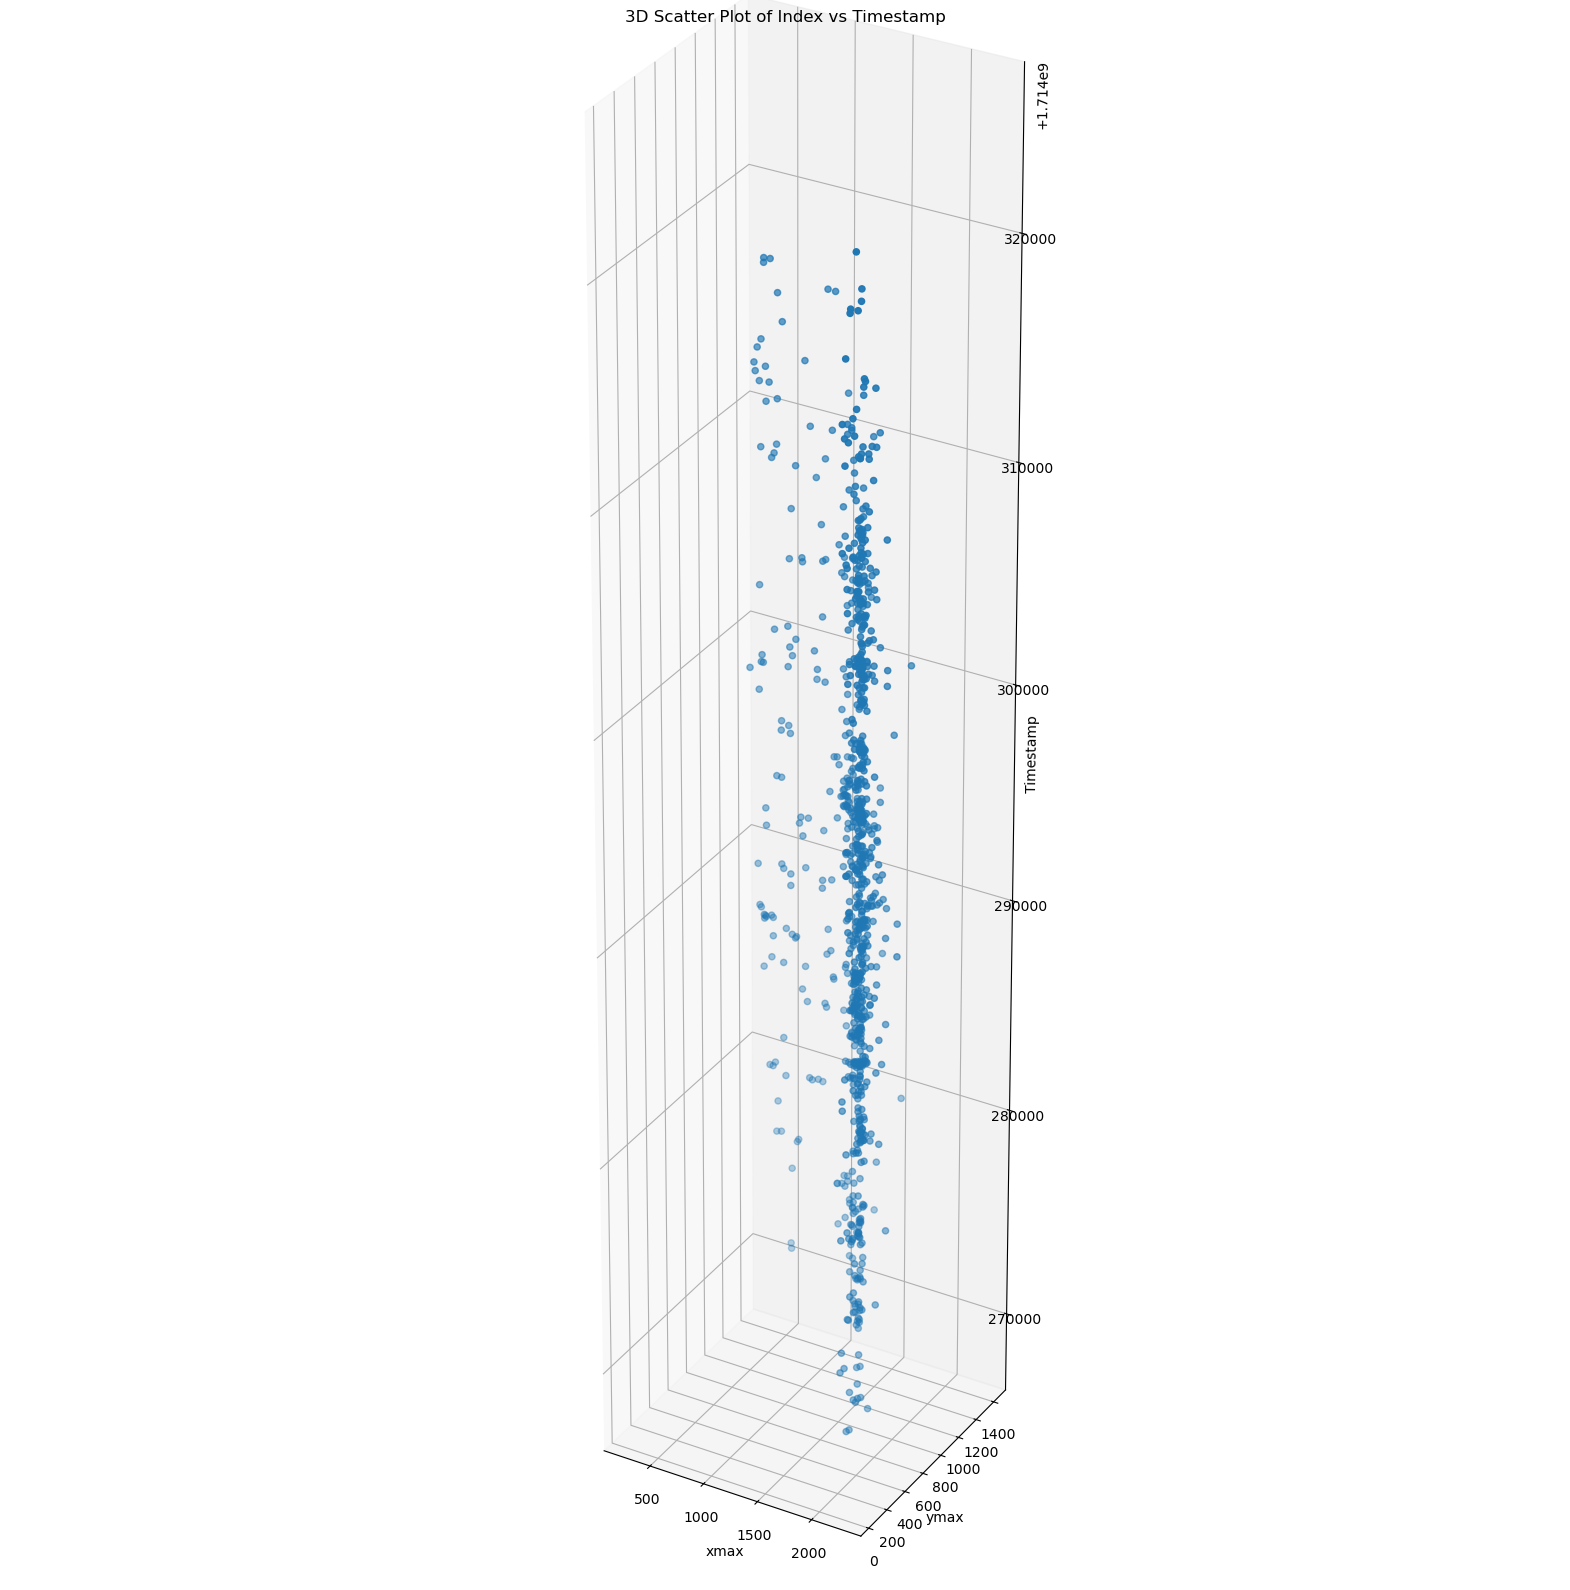

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df_cross = df_cross[df_cross['camera'] == 'mbk-14-13']

df_cross['timestamp_precise'] = pd.to_datetime(df_cross['timestamp_precise'])

fig = plt.figure(figsize=(20, 100))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cross['xmax'], df_cross['ymax'], df_cross['timestamp_unix'])
ax.set_xlabel('xmax')
ax.set_ylabel('ymax')
ax.set_zlabel('Timestamp')
ax.set_title('3D Scatter Plot of Index vs Timestamp')

# Set the aspect ratio of the axes
ax.set_box_aspect((1, 1, 5))  # Set the aspect ratio to 1, 1, 5
plt.show()

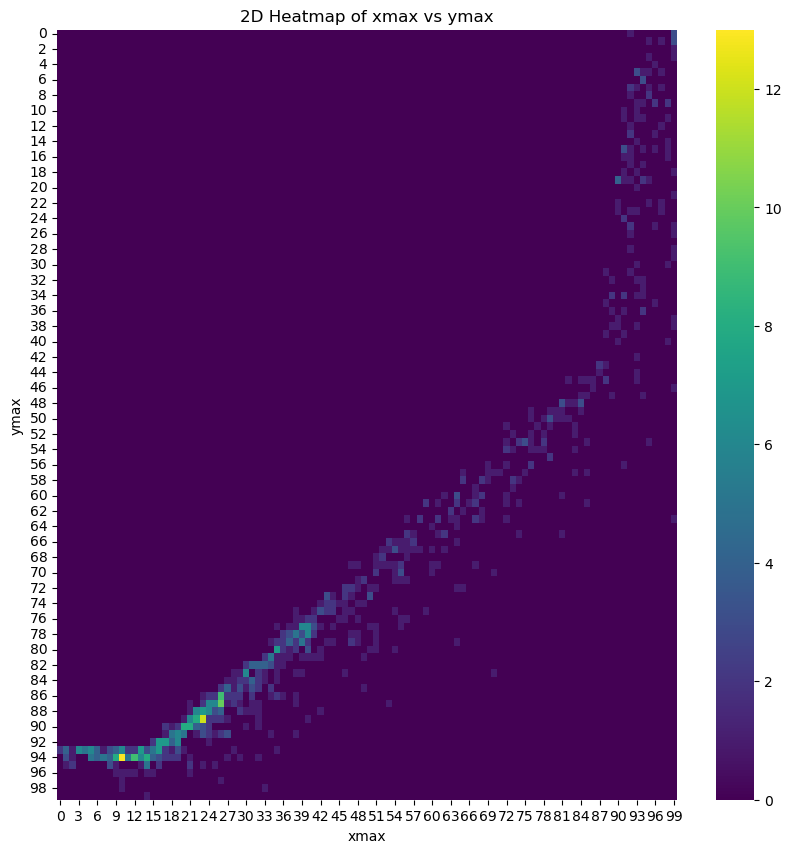

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a 2D grid of x and y values
x = df_cross['xmax']
y = df_cross['ymax']

# Create a 2D histogram of the data
hist, xedges, yedges = np.histogram2d(x, y, bins=100)

# Create a 2D heatmap of the data
plt.figure(figsize=(10, 10))
sns.heatmap(hist, cmap='viridis')
plt.xlabel('xmax')
plt.ylabel('ymax')
plt.title('2D Heatmap of xmax vs ymax')
plt.show()